In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
df = pd.read_csv(r'C:\Users\Shreedevi Tallam\Downloads\Dev\US Police Shootings.csv')

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


(10, 0)

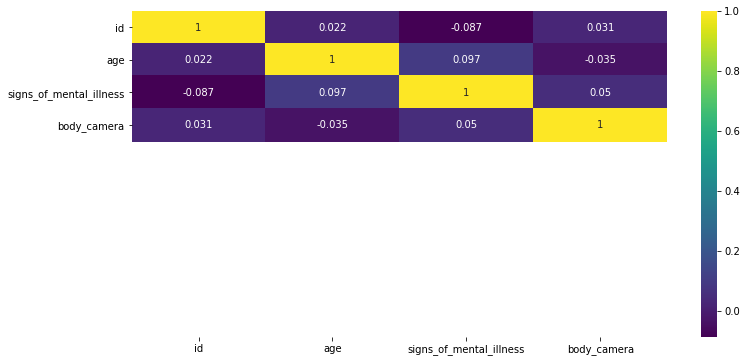

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(10, 0)

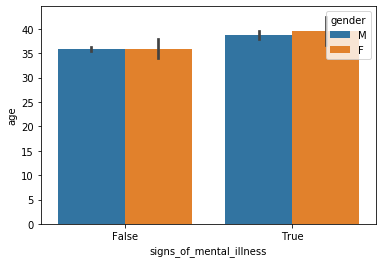

In [7]:
sns.barplot(df['signs_of_mental_illness'], df['age'], hue = df['gender'])

In [8]:
pd.crosstab(df['race'], df['arms_category'])

arms_category,Blunt instruments,Electrical devices,Explosives,Guns,Hand tools,Multiple,Other unusual objects,Piercing objects,Sharp objects,Unarmed,Unknown,Vehicles
race,,,,,,,,,,,,
Asian,5,0,1,35,0,3,2,1,31,7,8,0
Black,20,9,0,766,1,11,43,4,170,123,108,43
Hispanic,30,4,1,448,0,13,40,8,189,63,89,17
Native,2,1,0,41,0,0,1,1,19,4,8,1
Other,0,0,0,19,0,2,0,1,14,5,5,2
White,65,10,2,1455,0,25,106,14,395,146,200,58


In [9]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [10]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


In [11]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [12]:
x = df['month'].unique()

In [13]:
killed_per_month = df.groupby('month')['id'].count()

In [14]:
killed_per_month

month
1     505
2     462
3     503
4     430
5     418
6     399
7     413
8     371
9     328
10    367
11    354
12    345
Name: id, dtype: int64

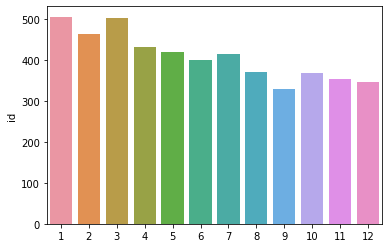

In [15]:
sns.barplot(df['month'].unique(),killed_per_month)

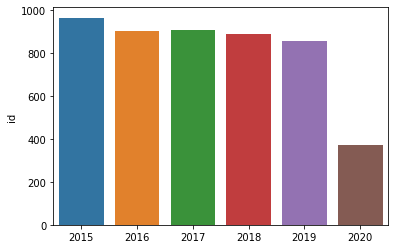

In [16]:
sns.barplot(df['year'].unique(), df.groupby('year')['id'].count())

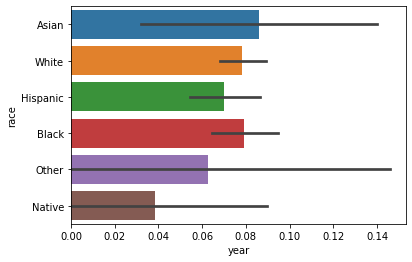

In [17]:
sns.barplot(df['year']==2020, df['race'])

In [18]:
df['year'].value_counts()

2015    965
2017    906
2016    904
2018    888
2019    858
2020    374
Name: year, dtype: int64

In [19]:
x = df.groupby(df['year'] == 2020)['id'].count()

In [20]:
x.head()

year
False    4521
True      374
Name: id, dtype: int64

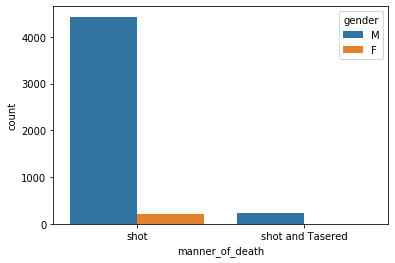

In [21]:
sns.countplot(x = df['manner_of_death'], hue = 'gender', data = df)

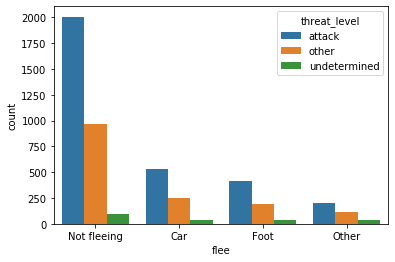

In [22]:
sns.countplot(df['flee'], hue = df['threat_level'])

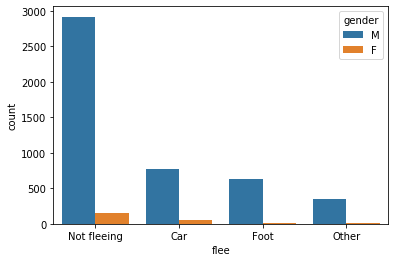

In [23]:
sns.countplot(df['flee'], hue = df['gender'])

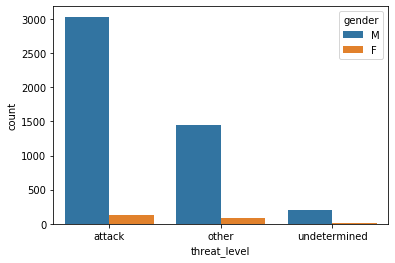

In [24]:
sns.countplot(df['threat_level'], hue = df['gender'])

In [25]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [26]:
init_notebook_mode(connected=True) 

In [27]:
df['state'].head()

0    WA
1    OR
2    KS
3    CA
4    CO
Name: state, dtype: object

In [28]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1


In [123]:
data = dict(type = 'choropleth',
           locations = states_df['state'],
           colorscale = 'YlOrRd',
           locationmode = 'USA-states',
           z = states_df['incidents'],
           colorbar = {'title':'Incident Density'})

In [124]:
layout = dict(geo = {'scope':'usa'},
             title = 'US Police Shootings by State')

In [125]:
choromap = go.Figure(data = [data],layout = layout)

In [126]:
iplot(choromap)

In [59]:
x = df.groupby('state')['id'].count()

In [60]:
x['WA']

126

In [35]:
df['incidents_by_state'] = x

In [36]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,incidents_by_state
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,NaN
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,NaN
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,NaN
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,NaN
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,NaN


In [37]:
df = df.drop('incidents_by_state', axis = 1)

In [38]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1


In [39]:
state_df = df['state'].value_counts()

In [40]:
x = state_df.value_counts()

In [41]:
state_df

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
NJ     60
MN     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
HI     29
MT     29
NE     24
ME     21
CT     20
SD     14
WY     13
DC     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: state, dtype: int64

In [43]:
state_df['incident'] = state_df.value_counts()

In [44]:
state_df.head()

CA    701
TX    426
FL    324
AZ    222
CO    168
Name: state, dtype: object

In [65]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [71]:
states_df = pd.DataFrame()

In [72]:
states_df['state'] = df['state'].unique()

In [73]:
states_df.head()

,state
0,WA
1,OR
2,KS
3,CA
4,CO


In [74]:
states_df.nunique()

state    51
dtype: int64

In [75]:
states_df['incidents'] = df.groupby('state')['id'].count()

In [76]:
states_df['incidents'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: incidents, dtype: float64

In [78]:
state_cases = df['state'].value_counts().to_list()

In [77]:
states_df.head()

,state,incidents
0,WA,NaN
1,OR,NaN
2,KS,NaN
3,CA,NaN
4,CO,NaN


In [79]:
states_df = states_df.drop('incidents', axis = 1)

In [80]:
states_df['incidents'] = state_cases

In [81]:
states_df.head()

,state,incidents
0,WA,701
1,OR,426
2,KS,324
3,CA,222
4,CO,168


In [82]:
states_df = states_df.drop('state', axis = 1)

In [84]:
state_names = dict(df['state'].value_counts()).keys()

In [85]:
state_names

dict_keys(['CA', 'TX', 'FL', 'AZ', 'CO', 'GA', 'OK', 'NC', 'OH', 'WA', 'TN', 'MO', 'LA', 'IL', 'PA', 'AL', 'NM', 'VA', 'IN', 'NY', 'WI', 'KY', 'NV', 'SC', 'MD', 'OR', 'AR', 'MI', 'MS', 'NJ', 'MN', 'UT', 'KS', 'WV', 'ID', 'AK', 'MA', 'IA', 'HI', 'MT', 'NE', 'ME', 'CT', 'SD', 'WY', 'DC', 'NH', 'ND', 'DE', 'VT', 'RI'])

In [112]:
state_names = df['state'].value_counts().index

In [113]:
states_df['state'] = state_names

In [114]:
states_df.head()

,incidents,state
0,701,CA
1,426,TX
2,324,FL
3,222,AZ
4,168,CO


In [157]:
states_2020['state'] = df[df['year'] == 2020]['state'].value_counts().index

In [148]:
states_2020 = pd.DataFrame()

In [151]:
states_2020.head()

,state
0,VA
1,CO
2,CA
3,MO
4,NV


In [158]:
len(states_2020)

45

In [159]:
states_2020.tail()

,state
40,IA
41,DE
42,NH
43,ID
44,HI


In [156]:
states_2020 = states_2020.drop('state', axis = 1)

In [173]:
states_2020['incident'] = df[df['year'] == 2020]['state'].value_counts().to_list()

In [174]:
states_2020.head()

,state,incident
0,CA,42
1,TX,33
2,FL,33
3,CO,18
4,NC,16


In [175]:
df[df['year'] == 2020]['state'].value_counts()

CA    42
TX    33
FL    33
CO    18
NC    16
AZ    16
GA    15
NV    12
OK    11
AL    11
WA    10
WI     9
IN     9
MD     9
AR     9
MO     9
NY     8
VA     8
TN     7
PA     6
SC     6
OH     6
AK     6
KY     6
LA     6
OR     5
UT     4
NM     4
CT     4
KS     3
IL     3
MT     3
NJ     3
MA     3
MN     3
ME     3
MS     3
ND     2
MI     2
NE     2
IA     2
DE     1
NH     1
ID     1
HI     1
Name: state, dtype: int64

In [176]:
#states_2020 = states_2020.drop('incident', axis = 1)

In [177]:
states_2020.head()

,state,incident
0,CA,42
1,TX,33
2,FL,33
3,CO,18
4,NC,16


In [182]:
data = dict(type = 'choropleth',
           locations = states_2020['state'],
           colorscale = 'YlOrRd',
           locationmode = 'USA-states',
           z = states_2020['incident'],
           marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
           colorbar = {'title':'Incident Density'})

In [183]:
layout = dict(geo = {'scope':'usa'},
             title = 'US Police Shootings by State (2020)')

In [184]:
choromap = go.Figure(data = [data],layout = layout)

In [185]:
iplot(choromap)

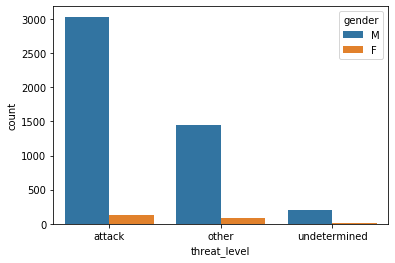

In [186]:
sns.countplot(df['threat_level'], hue = df['gender'])

In [187]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1


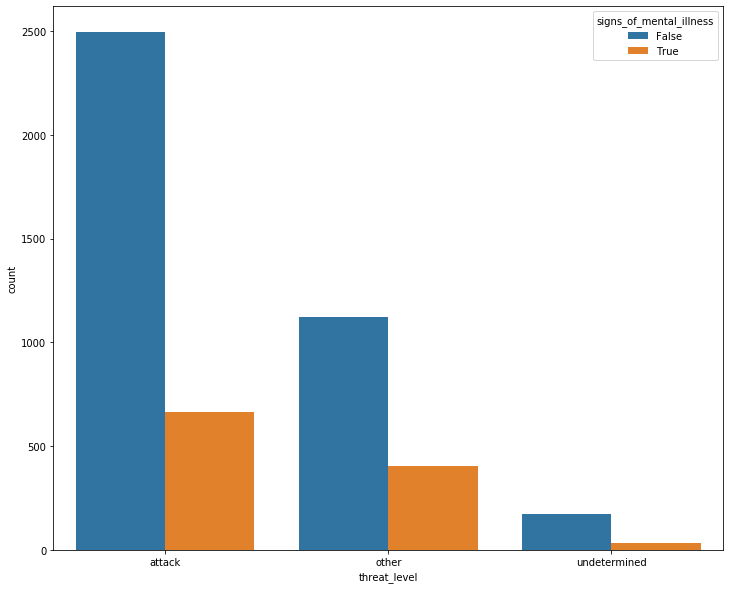

In [195]:
plt.figure(figsize=(12,10))
sns.countplot(df['threat_level'], hue = df['signs_of_mental_illness'])

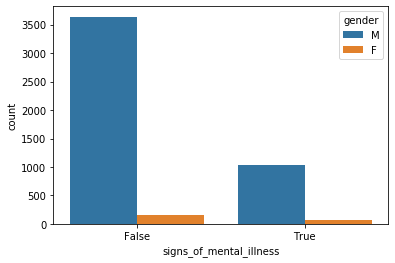

In [198]:
sns.countplot(df['signs_of_mental_illness'], hue = df['gender'])

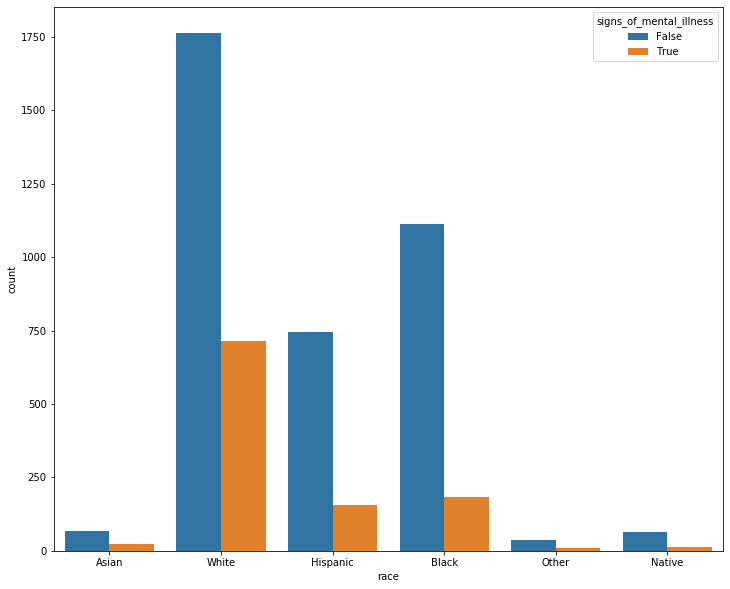

In [200]:
plt.figure(figsize=(12,10))
sns.countplot(df['race'], hue = df['signs_of_mental_illness'])

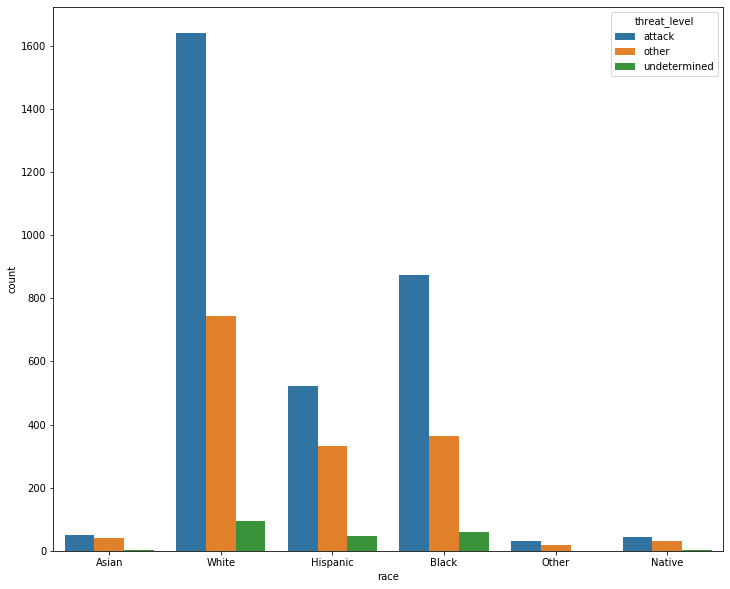

In [202]:
plt.figure(figsize=(12, 10))
sns.countplot(df['race'], hue = df['threat_level'])

In [8]:
x = pd.DataFrame()

In [9]:
x['ye'] = df.groupby('state')['id']

In [14]:
x

,ye
0,"(AK, [131, 836, 816, 953, 1166, 1255, 1305, 15..."
1,"(AL, [142, 166, 255, 176, 307, 581, 228, 476, ..."
2,"(AR, [36, 38, 364, 464, 1204, 1241, 1279, 1481..."
3,"(AZ, [13, 80, 85, 348, 349, 124, 125, 154, 156..."
4,"(CA, [8, 19, 43, 63, 68, 75, 86, 353, 346, 115..."
5,"(CO, [9, 57, 108, 20, 140, 269, 275, 369, 397,..."
6,"(CT, [750, 903, 1275, 1396, 1656, 1903, 2501, ..."
7,"(DC, [282, 955, 975, 1022, 1219, 1666, 1683, 1..."
8,"(DE, [273, 425, 862, 1669, 2251, 2470, 2514, 2..."
9,"(FL, [101, 116, 123, 134, 150, 170, 181, 199, ..."
